In [53]:
import numpy as np
import cv2
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [54]:
def load_binary_image(image_path, crop_top=0, crop_bottom=0):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) #image to grayscale
    image=image[crop_top:crop_bottom]
    _, binary_image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY) #grayscale to binary
    return binary_image

In [55]:
x = load_binary_image('gettest.png', 0, 300)

In [56]:
def extract_points_from_image(binary_image):

    points = np.argwhere(binary_image > 0)
 
    points = points[:, [1, 0]]  
    return points

In [57]:
def sinusoidal_function(x, A, phi, C):
    return A * np.sin(2 * np.pi * x/360 + phi) + C

In [58]:
test = sinusoidal_function(np.linspace(1,360,360), 1, 0, 1)

In [59]:
def get_photo(funcarr, height, width): 
    
    image = np.full((height, width), 255, dtype= np.uint8)
    min_val, max_val = np.min(funcarr), np.max(funcarr)
    scaler = MinMaxScaler((0, height-1))
    x_start = (width - len(funcarr))//2
    funcarr_reshaped = funcarr.reshape(-1,1)
    funcarr_normalized = scaler.fit_transform(funcarr_reshaped).flatten()
    for i in range(len(funcarr)):
        y_pos = funcarr_normalized[i].astype(np.int32)
        image[height - 1 - y_pos, x_start + i] = 0

    return image


In [60]:
l = get_photo(test, 500, 500)

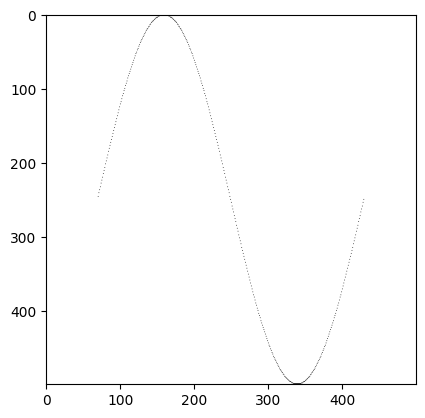

In [61]:
plt.imshow(l, cmap='gray')

In [62]:
plt.imsave(fname='gettest.png',arr = l, cmap='gray', vmin=0, vmax=255)

In [63]:
def fit_sinusoid(points):
    x = points[:, 0]  
    y = points[:, 1] 

    popt, pcov = curve_fit(sinusoidal_function, x, y, p0=[10, 0, np.mean(y)])  
    A, phi, C = popt
    return A, phi, C


In [ ]:
def metrics

In [64]:
def plot_results(image, points, A, phi, C):
    plt.imshow(image, cmap='gray')
    plt.scatter(points[:, 0], points[:, 1], color='red', s=1, label='Data points')

    x_fit = np.linspace(0, image.shape[1], 500)
    y_fit = sinusoidal_function(x_fit, A, phi, C)
    plt.plot(x_fit, y_fit, color='blue', label=f'Fit: A={A:.2f}, phi={phi:.2f}, C={C:.2f}')

    #plt.legend()
    plt.title('Sinusoidal Approximation')
    plt.show()


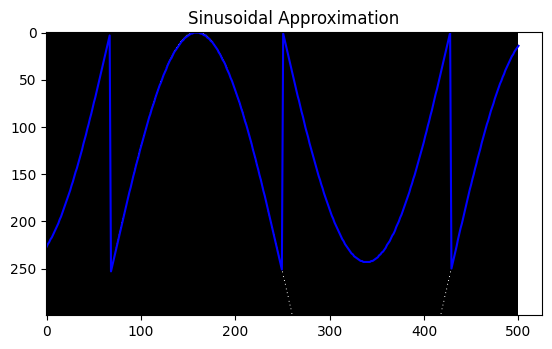

In [65]:
image_path = r"gettest.png"
initial_image = load_binary_image(image_path, 0, 300)
initial_image = np.array(initial_image, dtype=float)
initial_image = np.array(np.abs(initial_image-255)/255,dtype=np.uint8)

arr_with_int = np.where(initial_image.sum(axis =1)!=0)[0]
binary_image = load_binary_image(image_path, 0, 300)
binary_image = np.array(binary_image, dtype=float)

binary_image = np.array(np.abs(binary_image-255)/255,dtype=np.uint8)

binary_image[0:20]=0
binary_image[150:-1]=0
points = extract_points_from_image(binary_image)
A, phi, C = fit_sinusoid(points)
x_fit = np.arange(0,360,2)
y_fit = np.array(sinusoidal_function(x_fit, A, phi, C), dtype= int)
    
plt.imshow(initial_image, cmap='gray')
x_fit = np.linspace(0,initial_image.shape[1], 360)
y_fit = sinusoidal_function(x_fit, A, phi, C)
plt.plot(x_fit, np.array(y_fit, dtype='uint8'), color='blue', label=f'Fit: A={A:.2f}, phi={phi:.2f}, C={C:.2f}')
#plt.legend()
plt.title('Sinusoidal Approximation')
plt.show()
#условная метрика качества

